# Тестируем библиотеки на Хабре

In [1]:
import sys
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from memory_profiler import profile
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.extensions = [
   'autoreload',
   'memory_profiler']

sys.path.insert(0, 'parsers/bs4')
sys.path.insert(0, 'parsers/scrapy')
%load_ext memory_profiler

In [2]:
# Загружаем файлы
html_source_list_bs4 = ['tests/habr/tests_source/test{0}.html'.format(i) for i in range(1, 1396)]
html_source_list_scrapy = ['file:/tests/habr/tests_source/test{0}.html'.format(i) for i in range(1, 1396)]

html_files = []
for html in html_source_list_bs4:
    with open(html) as html_file:
        html_files.append(html_file.read())
        
def select_pages(page_limit, pages):
    return pages[:page_limit]
    

### BeautifulSoup

In [3]:
from parsers.bs4.habr_parser import parse_habr_bs4
from parsers.bs4.parse_bs4 import parse_bs4

Запустим парсинг на разном количестве страниц: сначала на 2, потом на 102, потом на 202 и так далее до 1396.

In [4]:
bs_time_measure = []
for page_limit in tqdm(range(2, 1396, 100)):
    pages = select_pages(page_limit, html_files)
    habr_data = []
    
    # замеряем время
    s = time.time()
    parse_bs4(parse_habr_bs4, pages, habr_data)
    t = time.time()
    
    bs_time_measure.append(t-s)
    

100%|██████████| 14/14 [00:00<00:00, 2894.33it/s]


In [5]:
habr_dataFrame = pd.DataFrame([next(i) for i in habr_data])
habr_dataFrame

,time,tags,habs,saved
0,29 апреля 2019 в 16:43,"[c++, clang, llvm, compiler, pvs-studio, open ...","[блог компании pvs-studio, open source, c++, к...",1
1,29 апреля 2019 в 16:48,"[lru, mru, cache]","[высокая производительность, программирование,...",100
2,29 апреля 2019 в 16:57,"[охлаждение цод, цод, чиллерное охлаждение]","[блог компании delta electronics, хостинг, it-...",7
3,29 апреля 2019 в 16:52,"[c++, clang, llvm, compiler, pvs-studio, open ...","[блог компании pvs-studio, open source, c++, к...",14
4,29 апреля 2019 в 18:55,"[фотография, резервное копирование, облако, li...","[резервное копирование, хранение данных, фотот...",158
...,...,...,...,...
1297,22 мая 2019 в 18:10,[виджет],"[интерфейсы, разработка под android, дизайн мо...",16
1298,23 мая 2019 в 17:06,"[testing, тестирование, багодельня]","[блог компании авито, хакатоны, тестирование в...",23
1299,23 мая 2019 в 10:00,"[microsoft, windows terminal]","[блог компании microsoft, powershell, разработ...",50
1300,22 мая 2019 в 19:15,"[марс, имя, mars, nasa, 2020]","[научно-популярное, космонавтика, астрономия]",38


### Scrapy

In [6]:
from parsers.scrapy.habrSpider import habrSpider
from parsers.scrapy.parse_scrapy import parse_scrapy

Запустим парсинг на разном количестве страниц: сначала на 2, потом на 102, потом на 202 и так далее до 1396.

In [7]:
scrapy_time_measure = []
for page_limit in tqdm(range(2, 1396, 100)):
    pages = select_pages(page_limit, html_source_list_scrapy)
    habr_data = []
    
    # замеряем время
    s = time.time()
    parse_scrapy(habrSpider, pages, habr_data)
    t = time.time()
    
    scrapy_time_measure.append(t-s)

100%|██████████| 14/14 [01:26<00:00,  6.19s/it]


In [8]:
habr_dataFrame = pd.DataFrame(habr_data)
habr_dataFrame

,time,tags,habs,saved
0,2019-04-29T13:43:52.000Z,"[c++, clang, llvm, compiler, pvs-studio, open ...","[open source, c++, компиляторы, devops]",1
1,2019-04-29T13:48:10.000Z,"[lru, mru, cache]","[высокая производительность, программирование,...",100
2,2019-04-29T13:57:01.000Z,"[охлаждение цод, цод, чиллерное охлаждение]","[хостинг, it-инфраструктура, it-компании, инже...",7
3,2019-04-29T13:52:32.000Z,"[c++, clang, llvm, compiler, pvs-studio, open ...","[open source, c++, компиляторы, devops]",14
4,2019-04-29T15:55:25.000Z,"[фотография, резервное копирование, облако, li...","[резервное копирование, хранение данных, фотот...",158
...,...,...,...,...
1294,2019-05-22T15:10:16.000Z,[виджет],"[интерфейсы, разработка под android, дизайн мо...",16
1295,2019-05-23T14:06:18.000Z,"[testing, тестирование, багодельня]","[хакатоны, тестирование веб-сервисов, тестиров...",23
1296,2019-05-23T07:00:03.000Z,"[microsoft, windows terminal]","[powershell, разработка под windows]",50
1297,2019-05-22T16:15:21.000Z,"[марс, имя, mars, nasa, 2020]","[научно-популярное, космонавтика, астрономия]",38


## Сравниваем время работы

### BeautifulSoup

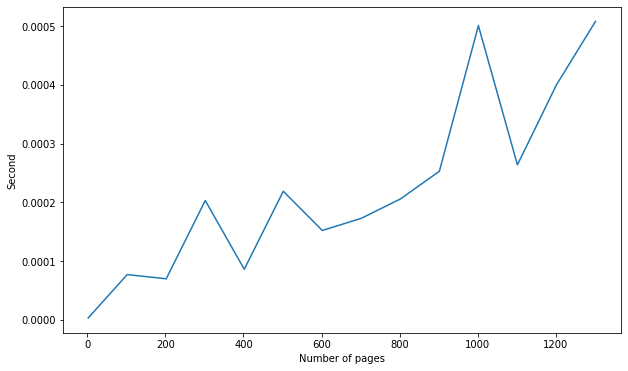

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(2, 1396, 100), bs_time_measure)
plt.xlabel("Number of pages")
plt.ylabel("Second")
plt.show()

### Scrapy

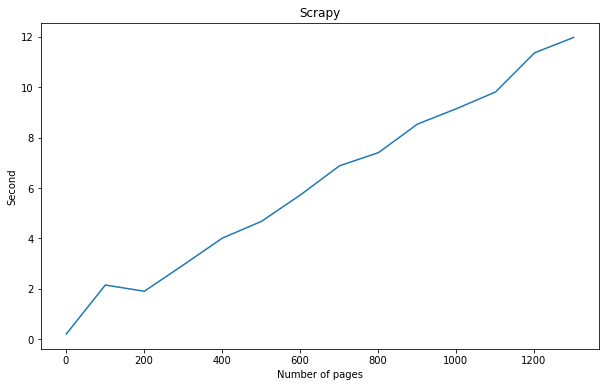

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(2, 1396, 100), scrapy_time_measure)
plt.title("Scrapy")
plt.xlabel("Number of pages")
plt.ylabel("Second")
plt.show()

## Сравниваем используемую память

### BeautifulSoup

In [11]:
%%file memory/memory_bs4_habr.py

from parsers.bs4.habr_parser import parse_habr_bs4
from parsers.bs4.parse_bs4 import parse_bs4

html_source_list_bs4 = ['tests/habr/tests_source/test{0}.html'.format(i) for i in range(1, 1396)]
html_source_list_scrapy = ['file:/tests/habr/tests_source/test{0}.html'.format(i) for i in range(1, 1396)]

html_files = []
for html in html_source_list_bs4:
    with open(html) as html_file:
        html_files.append(html_file.read())

def select_pages(page_limit, pages):
    return pages[:page_limit]

@profile
def test_bs4():
    for page_limit in range(2, 1396, 100):
        pages = select_pages(page_limit, html_files)
        habr_data = []

        parse_bs4(parse_habr_bs4, pages, habr_data)
        
test_bs4()

Overwriting memory/memory_bs4_habr.py


In [12]:
!python -m memory_profiler memory/memory_bs4_habr.py

Filename: memory/memory_bs4_habr.py

Line #    Mem usage    Increment  Occurences   Line Contents
    16  299.320 MiB  299.320 MiB           1   @profile
    17                                         def test_bs4():
    18  300.211 MiB    0.004 MiB          15       for page_limit in range(2, 1396, 100):
    19  300.211 MiB    0.008 MiB          14           pages = select_pages(page_limit, html_files)
    20  300.211 MiB    0.000 MiB          14           habr_data = []
    21                                         
    22  300.211 MiB    0.879 MiB          14           parse_bs4(parse_habr_bs4, pages, habr_data)




### Scrapy

In [13]:
%%file memory/memory_scrapy_habr.py

from parsers.scrapy.habrSpider import habrSpider
from parsers.scrapy.parse_scrapy import parse_scrapy

html_source_list_bs4 = ['tests/habr/tests_source/test{0}.html'.format(i) for i in range(1, 1396)]
html_source_list_scrapy = ['file:/tests/habr/tests_source/test{0}.html'.format(i) for i in range(1, 1396)]

html_files = []
for html in html_source_list_bs4:
    with open(html) as html_file:
        html_files.append(html_file.read())

def select_pages(page_limit, pages):
    return pages[:page_limit]

@profile
def test_scrapy():
    for page_limit in range(2, 1396, 100):
        pages = select_pages(page_limit, html_files)
        habr_data = []

        parse_scrapy(habrSpider, pages, habr_data)
        
test_scrapy()

Overwriting memory/memory_scrapy_habr.py


In [14]:
!python -m memory_profiler memory/memory_scrapy_habr.py

Filename: memory/memory_scrapy_habr.py

Line #    Mem usage    Increment  Occurences   Line Contents
    16  311.719 MiB  311.719 MiB           1   @profile
    17                                         def test_scrapy():
    18  359.633 MiB  -10.227 MiB          15       for page_limit in range(2, 1396, 100):
    19  356.258 MiB  -10.230 MiB          14           pages = select_pages(page_limit, html_files)
    20  356.258 MiB  -10.230 MiB          14           habr_data = []
    21                                         
    22  359.633 MiB   37.680 MiB          14           parse_scrapy(habrSpider, pages, habr_data)


